### 1.Import

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler,RobustScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from  sklearn.metrics import mean_absolute_error , mean_squared_error,root_mean_squared_error,r2_score
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

1.1 Models

### 2.Load dataset

In [52]:
path=r"C:\Users\mrtat\Downloads\NTI\Data\Housing.csv"

In [53]:
df = pd.read_csv(path)

2.1.Show Data

In [54]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [55]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [56]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### 3.Preprocessing

3.1Handle missing values

In [58]:
df.isna().sum().sort_values(ascending=False)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

3.2 Handle duplicated

In [59]:
df.duplicated().sum()

0

In [60]:
df.drop_duplicates(inplace=True)

In [61]:
df.shape

(545, 13)

In [62]:
df.columns.nunique()

13

3.3 Label Encode to all data

4.1 Data before balance

In [63]:
cols = list(df.nunique().sort_values().index[:])
cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus',
 'bathrooms',
 'stories',
 'parking',
 'bedrooms',
 'price',
 'area']

### Visulization

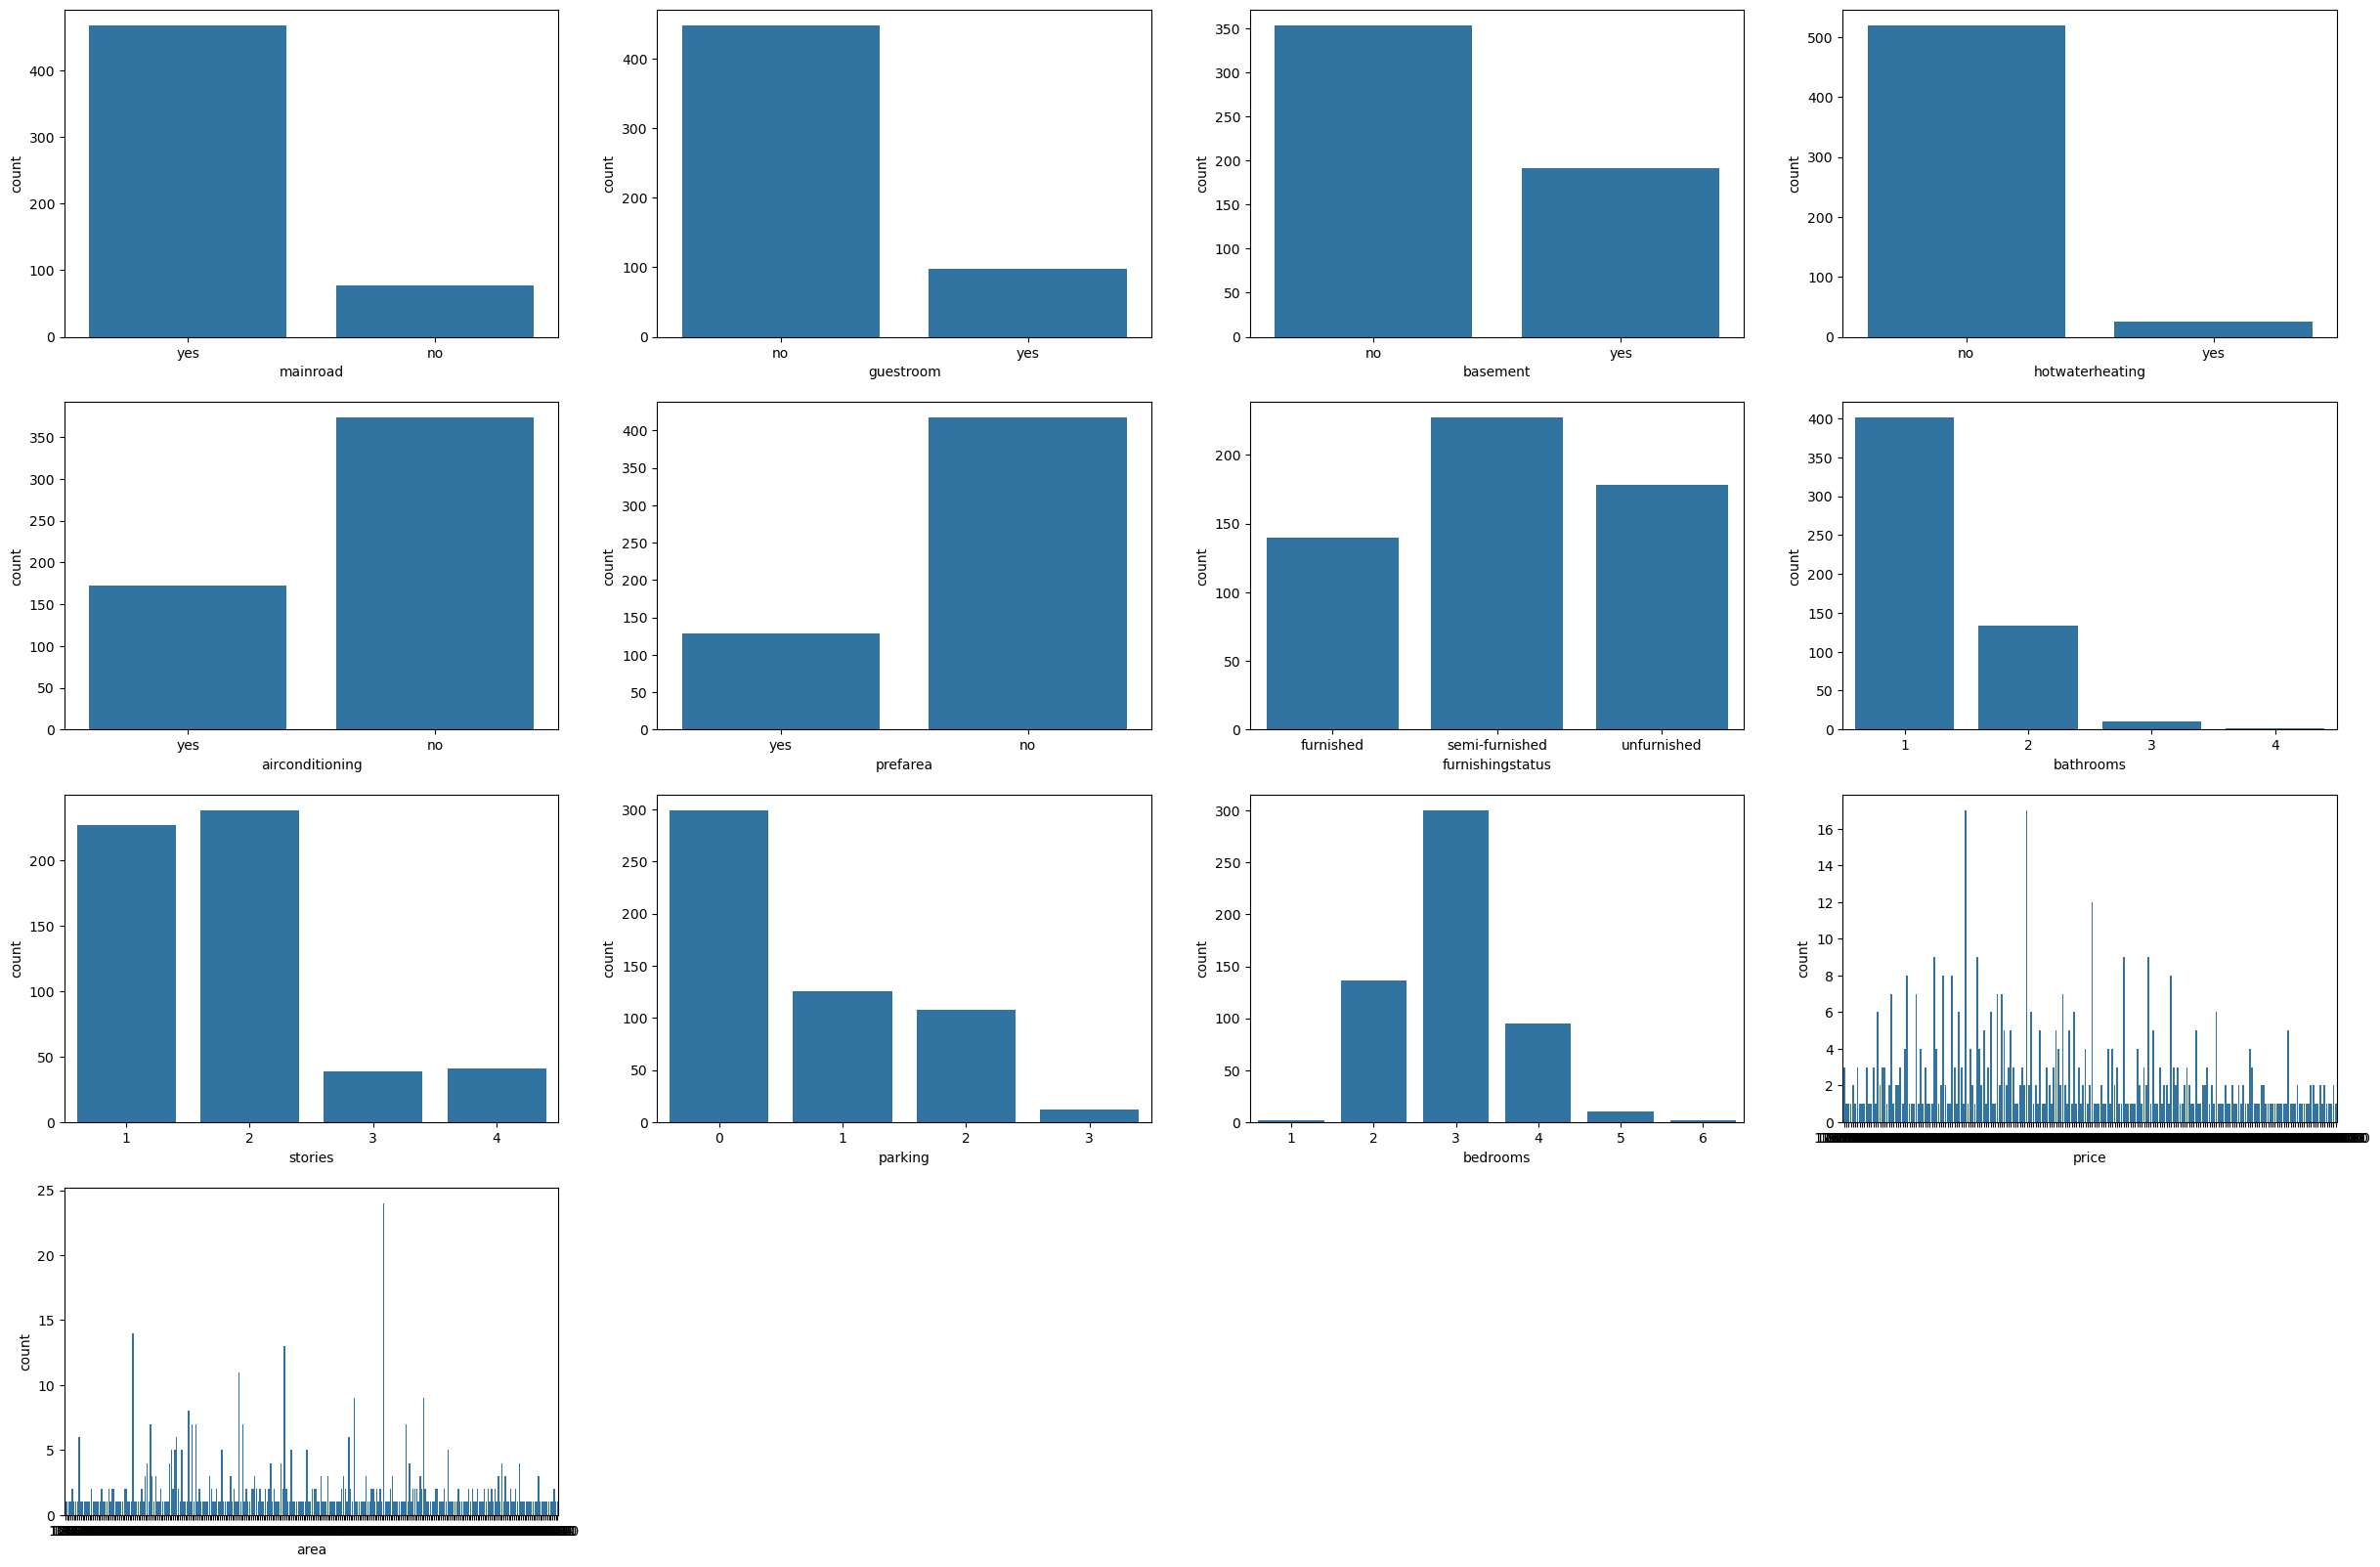

In [64]:

plt.figure(figsize=(30,20))
for n , col in enumerate(cols) :
    plt.subplot(4,4,n+1)
    sns.countplot(data=df,x=col)
    

<Axes: xlabel='area', ylabel='Count'>

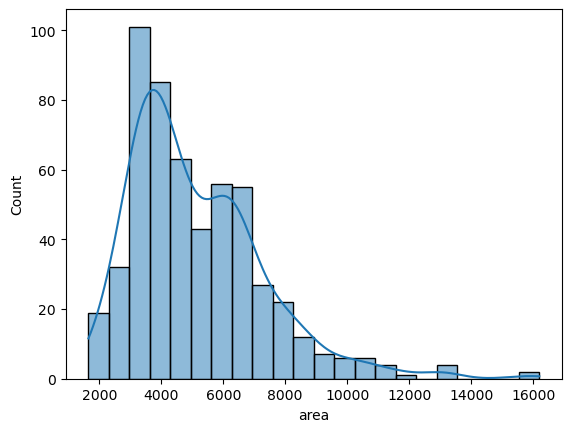

In [65]:
sns.histplot(data=df,x='area',kde=True)

<Axes: xlabel='price', ylabel='Count'>

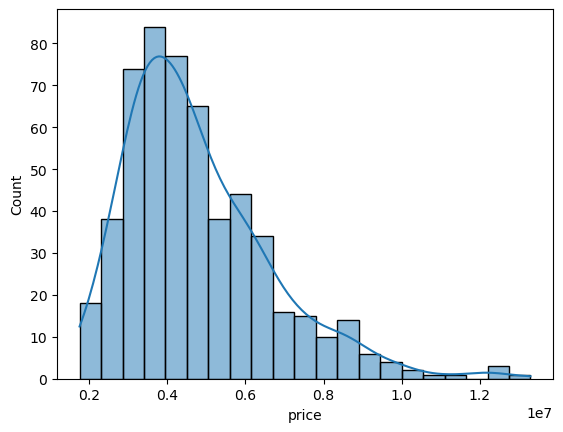

In [66]:
sns.histplot(data=df,x='price',kde=True) 

<Axes: xlabel='price', ylabel='area'>

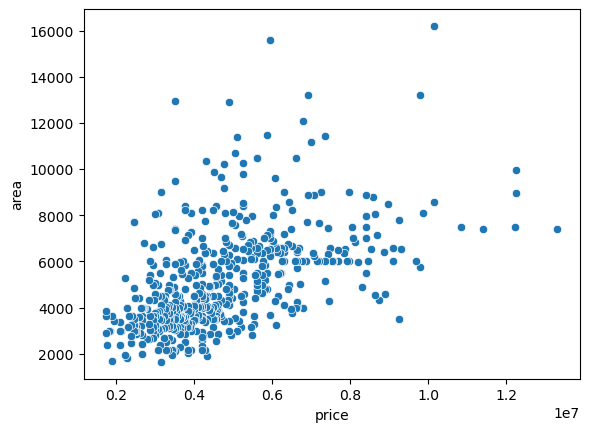

In [67]:
sns.scatterplot(data=df,x='price',y='area')

3.3 Split data

In [68]:
X = df.drop(['price'], axis=1)
y = df['price']

<Axes: >

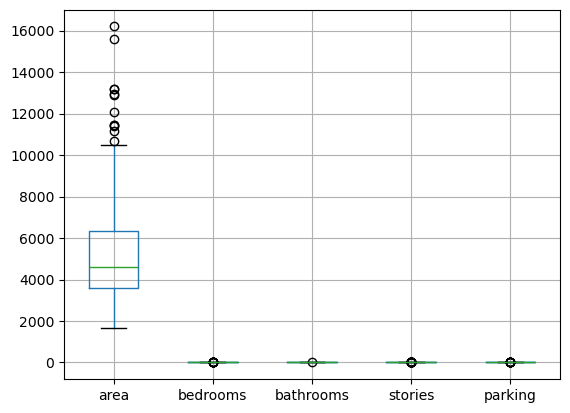

In [69]:
X.boxplot()

In [70]:
for c in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[c] = le.fit_transform(X[c].astype(str))


In [71]:
x_train1, x_test1, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train1)
x_test = scaler.transform(x_test1)

### 5.Train model

In [73]:
DT = DecisionTreeRegressor(random_state=42)
DT.fit(x_train, y_train)
print("Train Score: ",DT.score(x_train,y_train))
print("Test Score: ",DT.score(x_test,y_test))
y_pred_dt = DT.predict(x_test)

Train Score:  0.9985402884288594
Test Score:  0.4681689010023007


In [74]:
def evaluate(y_true, y_pred, model_name):
    print(f"\n📊 {model_name} Evaluation")
    print("R² Score:", r2_score(y_true, y_pred))
    print("MAE     :", mean_absolute_error(y_true, y_pred))
    print("MSE     :", mean_squared_error(y_true, y_pred))
    print("RMSE    :", np.sqrt(mean_squared_error(y_true, y_pred)))

In [75]:
evaluate(y_test, y_pred_dt, "Decision Tree Regressor")


📊 Decision Tree Regressor Evaluation
R² Score: 0.4681689010023007
MAE     : 1222399.0825688073
MSE     : 2688177649082.569
RMSE    : 1639566.2990811225
